In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab, requests
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
dataDir = './coco'
dataType = 'train2014'
# Load instances to get categories information
annFile = '%s/annotations/instances_%s.json' % (dataDir, dataType)

In [3]:
# initialize COCO api for captioning
coco = COCO(annFile)

loading annotations into memory...
Done (t=15.52s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print 'COCO categories: \n\n', ' '.join(nms)

nms = set([cat['supercategory'] for cat in cats])
print 'COCO supercategories: \n', ' '.join(nms)

COCO categories: 

person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush
COCO supercategories: 
outdoor food indoor appliance sports person animal vehicle furniture accessory electronic kitchen


In [5]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['umbrella'])
imgIds = coco.getImgIds(catIds=catIds )
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

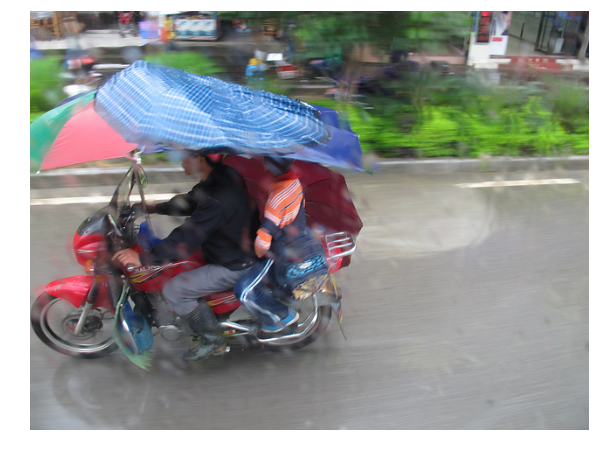

In [6]:
# load and display image and use url to load image
I = io.imread('http://mscoco.org/images/%d'%(img['id']))
plt.figure() 
plt.axis('off')
plt.imshow(I)
plt.show()

In [27]:
import os, urllib

MSCOCO_URL = 'http://mscoco.org/images/'

# Define 4 labels we'll work with
labels = ['umbrella']

# Number of images to download per label
NB_IMG = 10

for label in labels:
    catIds = coco.getCatIds(catNms=label)
    imgIds = coco.getImgIds(catIds=catIds)
    imgs = coco.loadImgs(imgIds[:NB_IMG])
    
    directory = dataDir + '/images/' + label + '/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    for img in imgs:
        filename = "%s%d.jpeg" % (directory, img['id'])
        if os.path.exists(filename):
            continue
        urllib.urlretrieve(MSCOCO_URL + '/%d' % img['id'], filename)